In [1]:
# Evaluation of experiments
import matplotlib.pyplot as plt
import pandas as pd

#dfExperiments = pd.read_csv('experiments_similarityScore_45_negativeSamples_3_2019-01-07T18-27-30.049.csv', sep=',', low_memory=False, header=None)
dfExperiments = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T17-59-12.297.csv', sep=',', low_memory=False, header=None)

dfExperimentsHARD = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T17-59-12.297.csv', sep=',', low_memory=False, header=None)

dfExperiments.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperimentsHARD.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']

In [2]:
#Rearrange DataFrame
def rearrange(df):
    dfAllExperimentsRearranged = pd.DataFrame()
    for index, row in df.iterrows():
        rowPrecision = row
        rowPrecision['ResultValue'] = row['Precision-Delta']
        rowPrecision['ResultValueType'] = 'Precision-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        rowRecall = row
        rowRecall['ResultValue'] = row['Recall-Delta']
        rowRecall['ResultValueType'] = 'Recall-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        #rowF1 = row
        #rowF1['ResultValue'] = row['F-1']
        #rowF1['ResultValueType'] = 'F-1'
        
        #dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowF1)
    
    return dfAllExperimentsRearranged

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotResults(df, title):
    sns.set(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(20,8))
    sns.catplot(x="shortExperiment", y="ResultValue", hue="ResultValueType", data=df, height=6, kind="bar", ax=ax1)
    
    titleAll = 'Transfer Comparison ' + title
    ax1.set_title(titleAll, fontweight="bold", size=20) # Title
    ax1.set_xlabel("Experiments",fontsize = 20.0)
    ax1.set_ylabel("" ,fontsize = 20.0) # Y label
    ax1.tick_params(direction='out', length=6, width=2, labelsize=20, grid_alpha=0.5)
    ax1.tick_params(axis = 'x', labelrotation=45)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

In [4]:
dfBaselineSubSet = dfExperimentsHARD[dfExperimentsHARD['Experiment'].str.contains('baseline_')]
dfBestBaseline = pd.DataFrame()
for target in set(dfBaselineSubSet['TargetTable']):
    dfTargetBaseline = dfBaselineSubSet[dfBaselineSubSet['TargetTable'] == target]
    dfTargetBaseline = dfTargetBaseline.sort_values(by=['F-1'], ascending=False)
    dfBestBaseline = dfBestBaseline.append(dfTargetBaseline.iloc[0])
display(dfBestBaseline)

,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
10,NaN,NaN,city,baseline_bag_of_words_city-all,0.730263,0.798561,0.672727,all,2019-01-07_17-47-34-552,NaN,all
3,NaN,NaN,city,baseline_label_city-WebTableDataCity.csv,0.676923,0.586667,0.800000,WebTableDataCity.csv,2019-01-07_17-47-30-310,NaN,WebTableDataCity.csv
7,NaN,NaN,city,baseline_bag_of_words_city-WikiDataCity.csv,0.840108,0.724299,1.000000,WikiDataCity.csv,2019-01-07_17-47-31-235,NaN,WikiDataCity.csv
1,NaN,NaN,city,baseline_bag_of_words_city-GeonamesData.csv,0.866345,0.766951,0.995338,GeonamesData.csv,2019-01-07_17-47-26-410,NaN,GeonamesData.csv


,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
10,NaN,NaN,city,baseline_bag_of_words_city-all,0.730263,0.798561,0.672727,all,2019-01-07_17-47-34-552,NaN,all
3,NaN,NaN,city,baseline_label_city-WebTableDataCity.csv,0.676923,0.586667,0.800000,WebTableDataCity.csv,2019-01-07_17-47-30-310,NaN,WebTableDataCity.csv
7,NaN,NaN,city,baseline_bag_of_words_city-WikiDataCity.csv,0.840108,0.724299,1.000000,WikiDataCity.csv,2019-01-07_17-47-31-235,NaN,WikiDataCity.csv
1,NaN,NaN,city,baseline_bag_of_words_city-GeonamesData.csv,0.866345,0.766951,0.995338,GeonamesData.csv,2019-01-07_17-47-26-410,NaN,GeonamesData.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.032931,-0.050863,Recall-Delta-Mean,0.156459,SimpleLogistic-GeonamesData.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.262068,-0.205208,Recall-Delta-Mean,0.169767,SimpleLogistic-WebTableDataCity.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.109534,-0.245338,Recall-Delta-Mean,0.352085,SimpleLogistic-WikiDataCity.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.069772,0.042618,Recall-Delta-Mean,0.021526,SimpleLogistic-all


-0.0305

0.1503

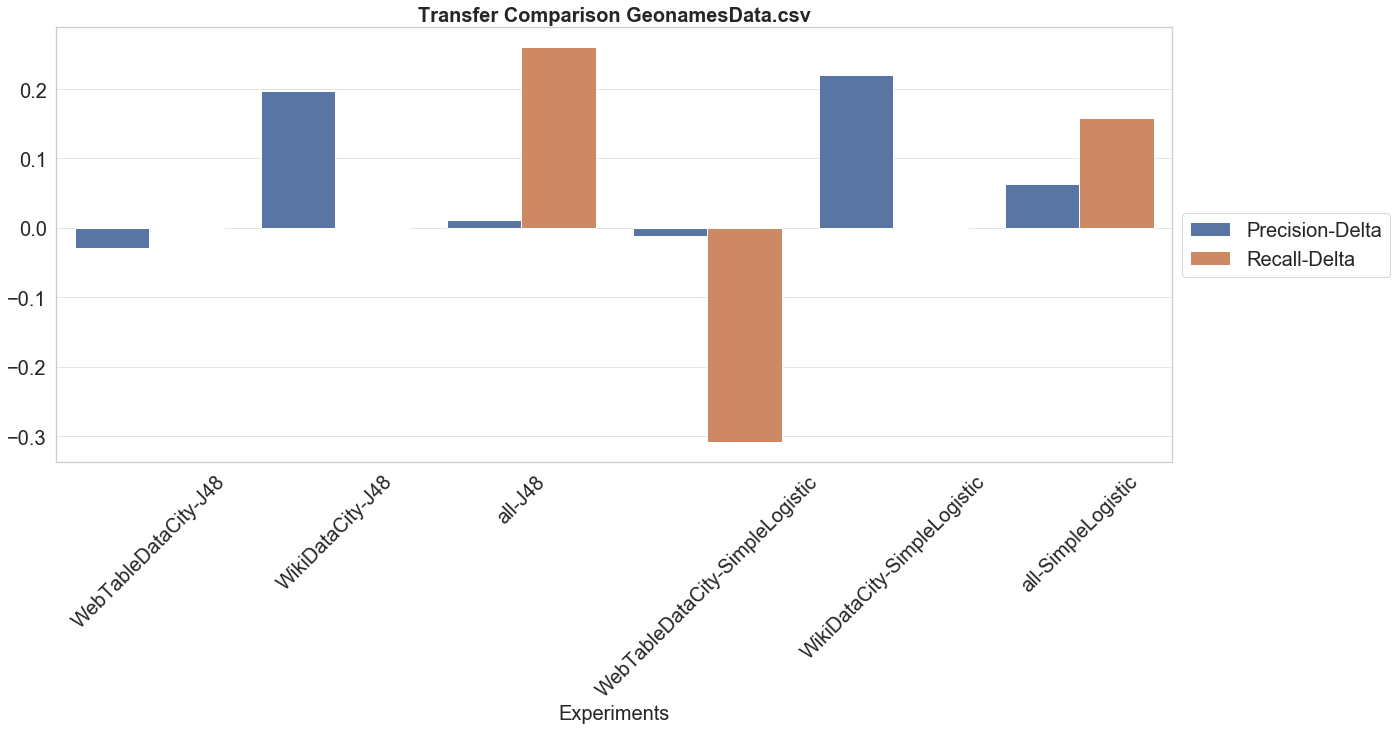

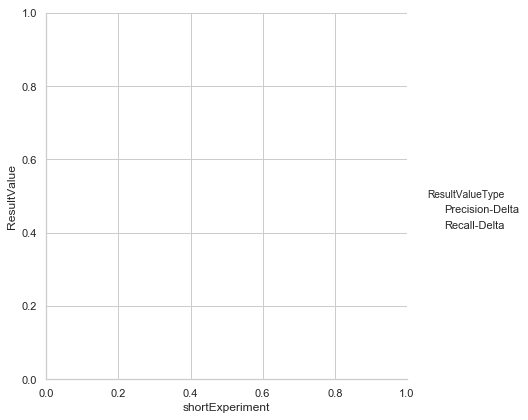

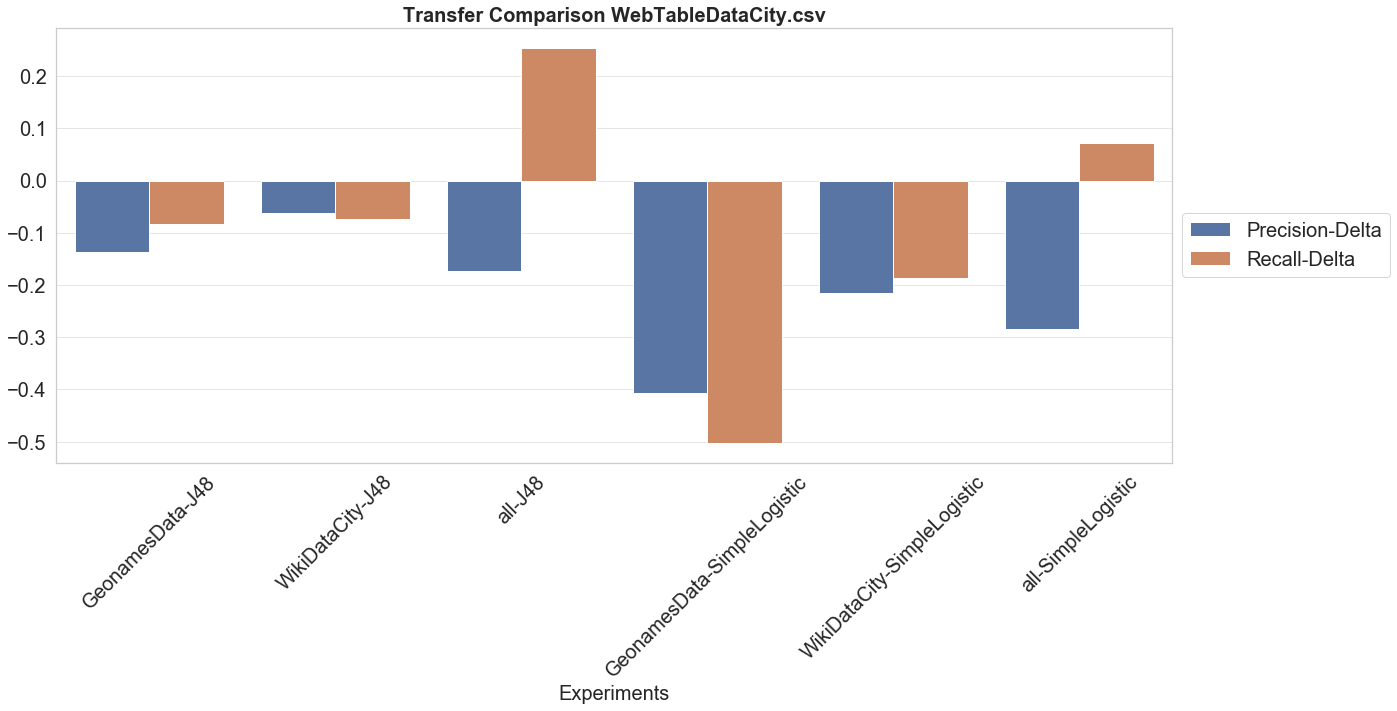

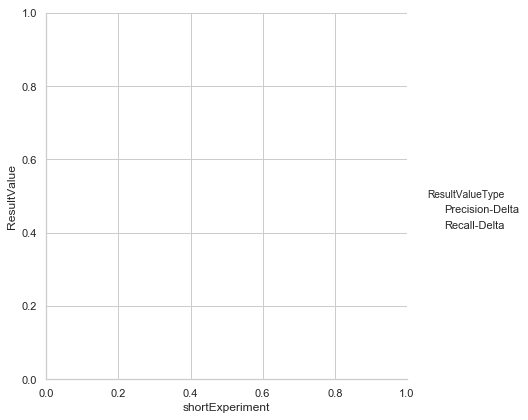

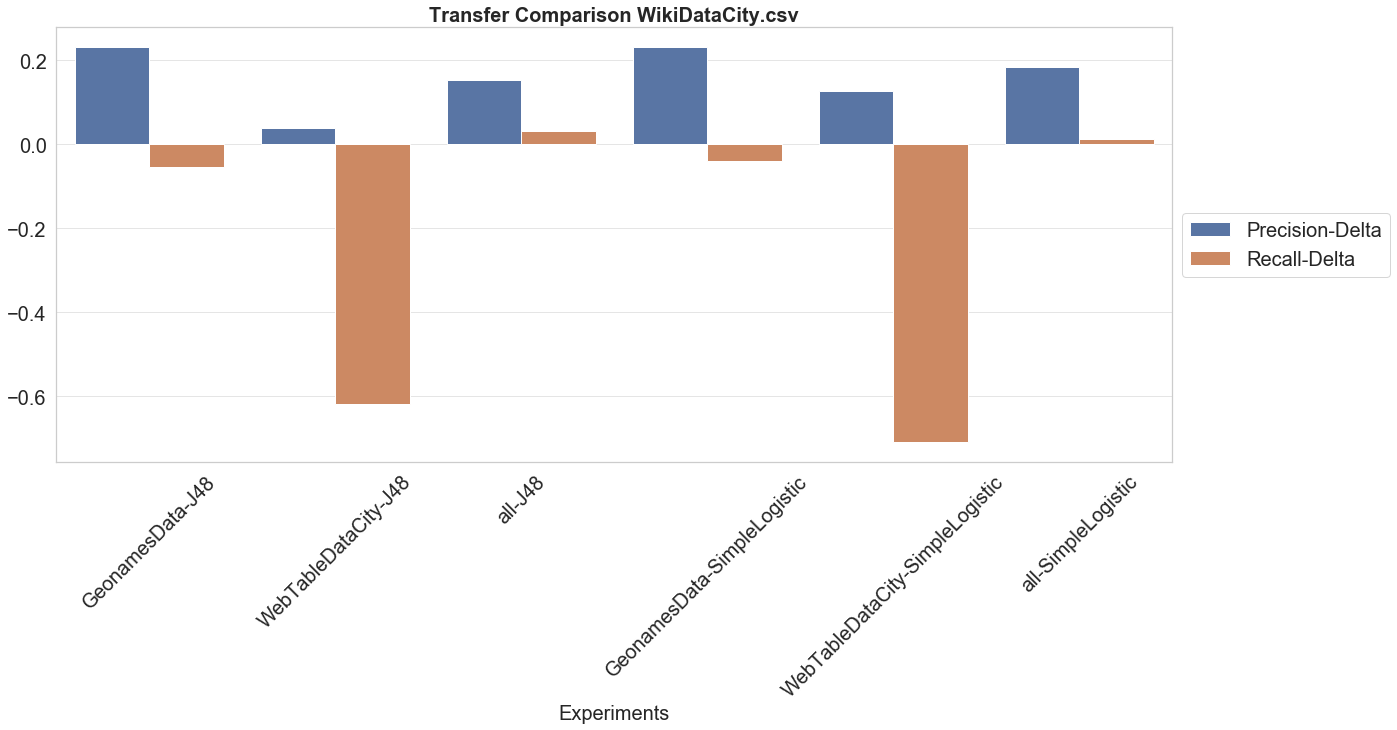

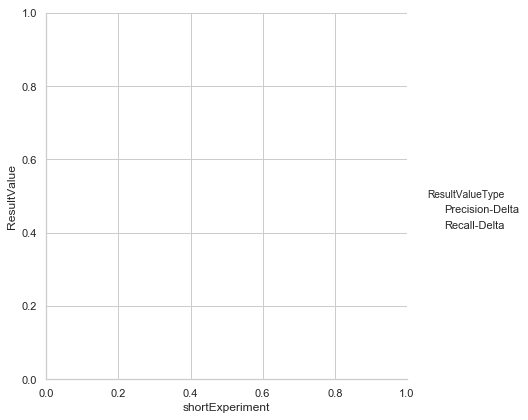

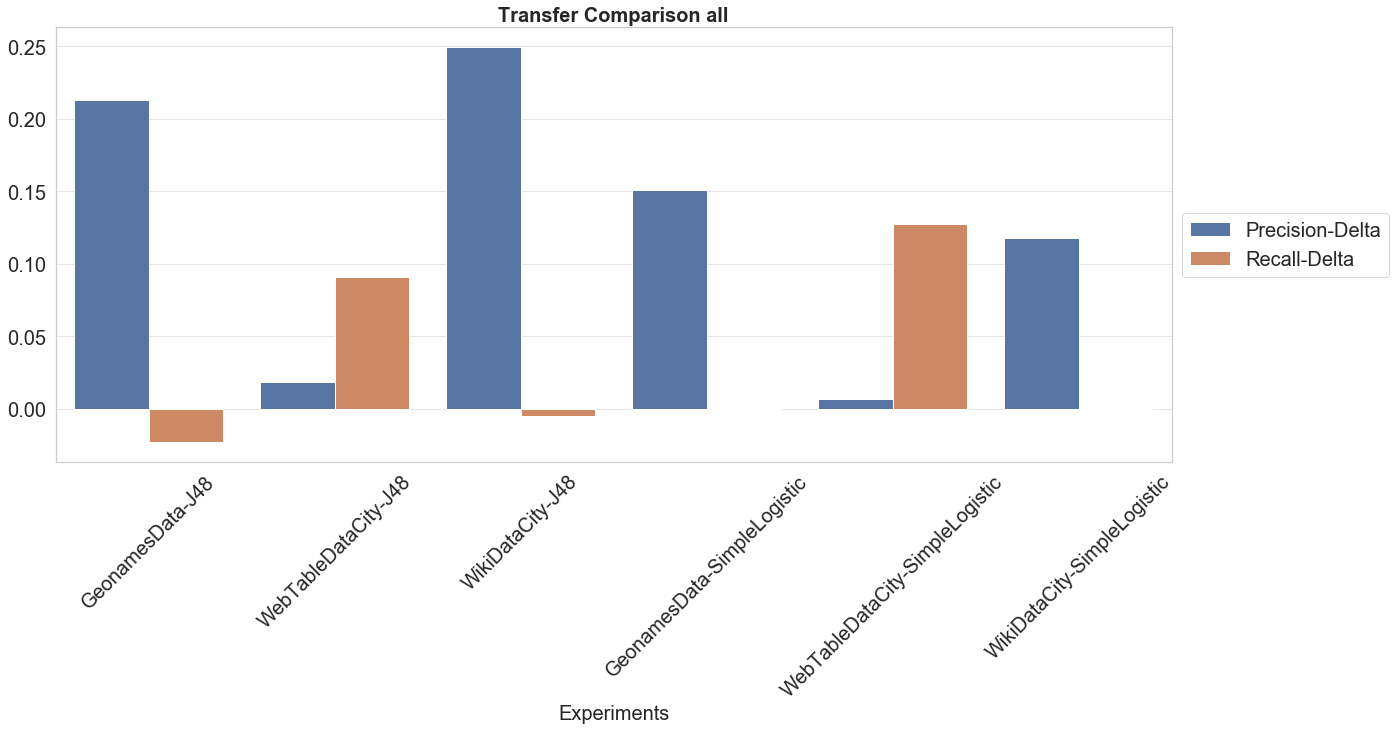

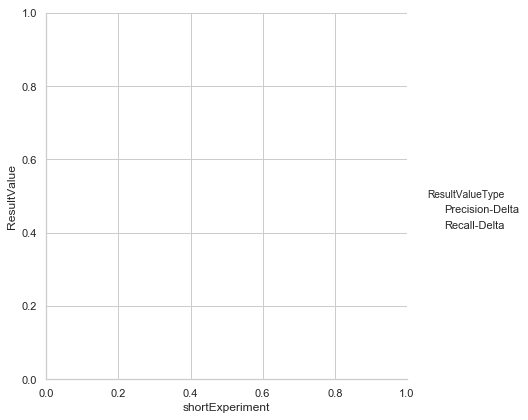

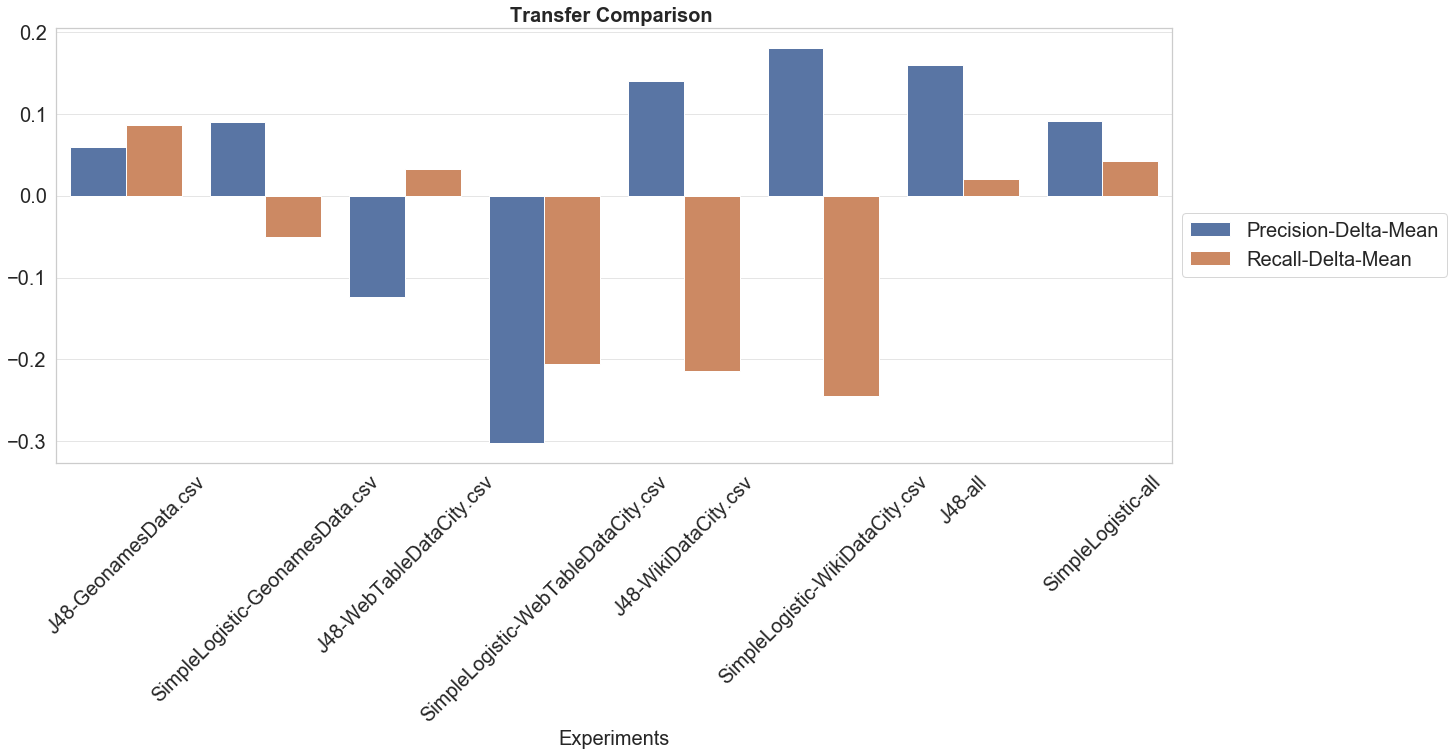

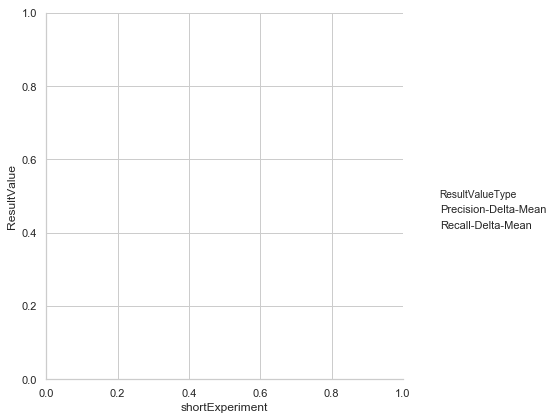

In [5]:
#Keep only transfer Experiments
dfExperimentsTransfer = dfExperiments[dfExperiments['Experiment'].str.contains('transfer_')]
dfExperimentsLearned = dfBestBaseline

dfMeanRulePerformance = pd.DataFrame()

display(dfExperimentsLearned)
for trainedOn in dfExperimentsTransfer['TrainedOn'].unique():
    dfTransferExperimentsTmpCompared = pd.DataFrame()
    
    dfSubSetExperimentsTransfer = dfExperimentsTransfer[dfExperimentsTransfer['TrainedOn'] == trainedOn]
    
    for indexTransfer, rowTransfer in dfSubSetExperimentsTransfer.iterrows():
        for indexLearned, rowLearned in dfExperimentsLearned.iterrows():
            if rowTransfer['TargetTable'] == rowLearned['TargetTable']:
                newRow = rowTransfer.copy()
                newRow['Precision-Delta'] = rowTransfer['Precision'] - rowLearned['Precision']
                newRow['Recall-Delta'] = rowTransfer['Recall'] - rowLearned['Recall']
                newRow['F-1-Delta'] = rowTransfer['F-1'] - rowLearned['F-1']
                newRow['Experiment'] = rowTransfer['Experiment']
            
                dfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared.append(newRow, ignore_index=True)
     
    #display(dfTransferExperimentsTmpCompared)
    meanRulePerformance = {}
    for model in dfTransferExperimentsTmpCompared['TrainedModel']:
        subdfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared[dfTransferExperimentsTmpCompared['TrainedModel'] == model]

        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Precision-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Precision-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
        
        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Recall-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Recall-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
    dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    display(dfMeanPerfSingle)
    dfTransferExperimentsTmpComparedRearranged = rearrange(dfTransferExperimentsTmpCompared)
    dfTransferExperimentsTmpComparedRearranged['shortExperiment'] = dfTransferExperimentsTmpComparedRearranged['TargetTable'].str.replace('hotels_www.','').str.replace('.csv', '').str.cat(dfTransferExperimentsTmpComparedRearranged['TrainedModel'], sep='-')
    plotResults(dfTransferExperimentsTmpComparedRearranged, trainedOn)
    
plotResults(dfMeanRulePerformance, '')
display(round(dfMeanRulePerformance['MeanF1Delta'].mean(),4))
display(round(dfMeanRulePerformance['StdF1Delta'].mean(),4))

In [6]:
import csv
dfExperimentsTransferFiltered = dfExperimentsTransfer.filter(items=['Experiment','Precision', 'Recall', 'F-1', 'TargetTable', 'TrainedOn', 'TrainedModel'])
dfResultsRQ2 = pd.DataFrame()

for target in set(dfExperimentsTransferFiltered['TargetTable']):
    dfSubSeTransfertExperiments = dfExperimentsTransferFiltered[dfExperimentsTransferFiltered['TargetTable'] == target]
    dfSubBestBaseline = dfBestBaseline[dfBestBaseline['TargetTable'] == target]
    bestBaseline = dfSubBestBaseline.iloc[0]
    dfSubSeTransfertExperiments['F-1 Baseline'] = bestBaseline['F-1']
    dfSubSeTransfertExperiments['Precision Baseline'] = bestBaseline['Precision']
    dfSubSeTransfertExperiments['Recall Baseline'] = bestBaseline['Recall']
    dfSubSeTransfertExperiments['Best Baseline'] = bestBaseline['Experiment']
    dfSubSeTransfertExperiments['Delta F-1'] = dfSubSeTransfertExperiments['F-1'] - dfSubSeTransfertExperiments['F-1 Baseline']
    dfSubSeTransfertExperiments['Delta Precision'] = dfSubSeTransfertExperiments['Precision'] - dfSubSeTransfertExperiments['Precision Baseline']
    dfSubSeTransfertExperiments['Delta Recall'] = dfSubSeTransfertExperiments['Recall'] - dfSubSeTransfertExperiments['Recall Baseline']
    #dfSubSeTransfertExperiments['Delta Precision'] = bestBaseline['Precision'].subtract(dfSubSeTransfertExperiments['Precision Baseline'])
    #dfSubSeTransfertExperiments['Delta Recall'] = bestBaseline['Recall'].subtract(dfSubSeTransfertExperiments['Recall Baseline'])
    dfResultsRQ2 = dfResultsRQ2 .append(dfSubSeTransfertExperiments)

display(dfResultsRQ2)
dfResultsRQ2.to_csv('rq2_results_city.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Experiment,Precision,Recall,F-1,TargetTable,TrainedOn,TrainedModel,F-1 Baseline,Precision Baseline,Recall Baseline,Best Baseline,Delta F-1,Delta Precision,Delta Recall
15,transfer_matchingRule_city-GeonamesData.csv,0.810526,0.933333,0.867606,all,GeonamesData.csv,J48,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,0.137342,0.011965,0.260606
19,transfer_matchingRule_city-WebTableDataCity.csv,0.624490,0.927273,0.746341,all,WebTableDataCity.csv,J48,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,0.016078,-0.174071,0.254545
23,transfer_matchingRule_city-WikiDataCity.csv,0.950820,0.703030,0.808362,all,WikiDataCity.csv,J48,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,0.078099,0.152259,0.030303
31,transfer_matchingRule_city-GeonamesData.csv,0.861635,0.830303,0.845679,all,GeonamesData.csv,SimpleLogistic,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,0.115416,0.063074,0.157576
35,transfer_matchingRule_city-WebTableDataCity.csv,0.514644,0.745455,0.608911,all,WebTableDataCity.csv,SimpleLogistic,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,-0.121352,-0.283917,0.072727
39,transfer_matchingRule_city-WikiDataCity.csv,0.982609,0.684848,0.807143,all,WikiDataCity.csv,SimpleLogistic,0.730263,0.798561,0.672727,baseline_bag_of_words_city-all,0.076880,0.184048,0.012121
13,transfer_matchingRule_city-GeonamesData.csv,0.556962,0.800000,0.656716,WebTableDataCity.csv,GeonamesData.csv,J48,0.676923,0.586667,0.800000,baseline_label_city-WebTableDataCity.csv,-0.020207,-0.029705,0.000000
22,transfer_matchingRule_city-WikiDataCity.csv,0.625000,0.181818,0.281690,WebTableDataCity.csv,WikiDataCity.csv,J48,0.676923,0.586667,0.800000,baseline_label_city-WebTableDataCity.csv,-0.395233,0.038333,-0.618182
26,transfer_matchingRule_city-all,0.604938,0.890909,0.720588,WebTableDataCity.csv,all,J48,0.676923,0.586667,0.800000,baseline_label_city-WebTableDataCity.csv,0.043665,0.018272,0.090909
29,transfer_matchingRule_city-GeonamesData.csv,0.574468,0.490909,0.529412,WebTableDataCity.csv,GeonamesData.csv,SimpleLogistic,0.676923,0.586667,0.800000,baseline_label_city-WebTableDataCity.csv,-0.147511,-0.012199,-0.309091


In [10]:
dfResultsRQ2 = dfResultsRQ2.sort_values(by=['TargetTable', 'TrainedOn', 'TrainedModel'])

dfResultsRQ2Filtered = dfResultsRQ2.filter(items=['TargetTable', 'TrainedOn', 'TrainedModel', 'Precision', 'Recall',  'F-1','Best Baseline','Delta Precision','Delta Recall','Delta F-1'])
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.replace('baseline_', '').str.replace('_city', '')
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.split('-', expand=True)[0]
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('J48', 'DT')
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('SimpleLogistic', 'LR')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('.csv', '')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('GeonamesData', 'GN')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('WebTableDataCity', 'WT')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('WikiDataCity', 'WD')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('.csv', '')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('GeonamesData', 'GN')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('WebTableDataCity', 'WT')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('WikiDataCity', 'WD')

dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('all', 'All')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('bag_of_words', 'BoW')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('linear_combination', 'LC')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('label', 'Label')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.round(3)

display(dfResultsRQ2Filtered)

print(dfResultsRQ2Filtered.to_latex(index=False))
dfResultsRQ2Filtered.to_csv('rq2_results_city.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

,TargetTable,TrainedOn,TrainedModel,Precision,Recall,F-1,Best Baseline,Delta Precision,Delta Recall,Delta F-1
17,GN,WT,DT,0.631,0.913,0.746,BoW,-0.136,-0.083,-0.120
33,GN,WT,LR,0.359,0.493,0.416,BoW,-0.408,-0.502,-0.451
21,GN,WD,DT,0.998,0.941,0.969,BoW,0.231,-0.054,0.102
37,GN,WD,LR,0.998,0.956,0.976,BoW,0.231,-0.039,0.110
25,GN,All,DT,0.979,0.972,0.976,BoW,0.212,-0.023,0.109
41,GN,All,LR,0.918,0.996,0.955,BoW,0.151,0.001,0.089
13,WT,GN,DT,0.557,0.800,0.657,Label,-0.030,0.000,-0.020
29,WT,GN,LR,0.574,0.491,0.529,Label,-0.012,-0.309,-0.148
22,WT,WD,DT,0.625,0.182,0.282,Label,0.038,-0.618,-0.395
38,WT,WD,LR,0.714,0.091,0.161,Label,0.128,-0.709,-0.516


\begin{tabular}{lllrrrlrrr}
\toprule
TargetTable & TrainedOn & TrainedModel &  Precision &  Recall &    F-1 & Best Baseline &  Delta Precision &  Delta Recall &  Delta F-1 \\
\midrule
         GN &        WT &           DT &      0.631 &   0.913 &  0.746 &           BoW &           -0.136 &        -0.083 &     -0.120 \\
         GN &        WT &           LR &      0.359 &   0.493 &  0.416 &           BoW &           -0.408 &        -0.502 &     -0.451 \\
         GN &        WD &           DT &      0.998 &   0.941 &  0.969 &           BoW &            0.231 &        -0.054 &      0.102 \\
         GN &        WD &           LR &      0.998 &   0.956 &  0.976 &           BoW &            0.231 &        -0.039 &      0.110 \\
         GN &       All &           DT &      0.979 &   0.972 &  0.976 &           BoW &            0.212 &        -0.023 &      0.109 \\
         GN &       All &           LR &      0.918 &   0.996 &  0.955 &           BoW &            0.151 &         0.001 &   